In [42]:
### Machine Running library install
from sklearn.neighbors import KNeighborsClassifier


from sklearn.linear_model import LogisticRegression

### 선형, 다중, 다항 회귀모델 라이브러리 정의
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso

### 앙상블 모델
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import ExtraTreesRegressor
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.ensemble import HistGradientBoostingRegressor
from xgboost import XGBRegressor

### visualization library
import matplotlib.pyplot as plt

# Definition of the NumPy library
import numpy as np

### Definition of Library (Preprocessing Library)
from sklearn.model_selection import train_test_split

### 평가 라이브러리 정의
# 평균절대오차(MAE)
from sklearn.metrics import mean_absolute_error
# 평균제곱오차(MSE)
from sklearn.metrics import mean_squared_error
# 결정계수(R2-score)
from sklearn.metrics import r2_score

### 오차행렬 및 오차행렬도 라이브러리 정의하기
from sklearn.metrics import confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay

# - 변환기 모델(클래스) 라이브러리 정의하기
from sklearn.preprocessing import PolynomialFeatures
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import RobustScaler

# 정확도
from sklearn.metrics import accuracy_score
# 정밀도
from sklearn.metrics import precision_score
# 재현율
from sklearn.metrics import recall_score
# f1-score
from sklearn.metrics import f1_score


# - 결정트리 모델(클래스) 라이브러리 정의
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import plot_tree

import pandas as pd 

import seaborn as sns


### 라이브러리 정의
from scipy.stats import spearmanr

### 라이브러리 정의
from scipy.stats import pearsonr

### 라이브러리 정의
from scipy.stats import randint, uniform


### 하이퍼파라미터 튜닝 모델(클래스) 정의하기
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV

plt.rc("font", family="Malgun Gothic")

plt.rcParams["axes.unicode_minus"] = False

### 경고 메시지 없애기
# - 사이킷런 버전에 따라 오류가 아니니 안내(경고)메시지가 자주 나타남
# - 안내(경고) 메시지 없이 실행할 수 있도록 처리
from sklearn import set_config
set_config(display="text")


In [ ]:
"""
<앙상블 모델>
 - 회귀분석 및 분류분석에 모두 사용가능한 모델로 , 매우 성능 좋은 모델임
 - DT 모델을 기반으로 만들어진 모델임(Tree 구조를 가지는 모델임)
 - DT 모델 여러개를 하나의 모델로 묶어서 만든 모델이 앙상블 모델임
 - 앙상블 모델: RandomForestRegressor < ExtraTreesRegressor < GradientBoostingRegressor < HistGradientBoostingRegressor < XGBRegressor, 등등....
 
 <앙상블 모델 분류>
  - 배깅(Bagging)과 부스트(Boost) 방식으로 분류함
  - 분류 기준은 배깅 또는 부스트 모델이 내부적으로 데이터를 어떻게 사용하는지에 따라 분류
  - 배깅(Bagging) 모델: RandomForestRegressor, ExtraTreesRegressor
                      : 내부적으로 사용되는 트리 모델들이 사용하는 데이터는 서로 "독접적"임
                      : 훈련데이터에서 각 트리 모델에 데이터를 랜덤하게 적용 후 반환받음
                      : 다른 트리 모델에서 다시 훈련데이터에서 랜덤하게 적용 후 훈련 반복.
                      : 중복된 데이터는 훈련에 사용될 수 있음
                      
  - 부스트(Boost) 모델: GradientBoostingRegressor, HistGradientBoostingRegressor, XGBRegressor
                      : 내부적으로 사용되는 각 트리 모델들이 사용하는 데이터는 서로 "연관성"을 가짐
                      : 훈련데이터를 사용하는 방식은 배깅(Bagging) 방식과 동일하지만,
                      : 차이점은, 이전 트리 모델에서 발생한 오차 데이터에 가중치를 부여하여,
                                  다음 트리모델에 전달하는 방식으로 사용하게됨(성능을 높이는 방식)
                      
  - 부스트(Boost) 모델이 배깅(Bagging) 모델보다 성능이 다소 높은 편임
"""

### 데이터 읽어들이기

In [4]:
### 08_wine.csv 데이터셋 읽어들이기
# - 변수명: wine
wine = pd.read_csv("./data/08_wine.csv")
wine.info()
wine.head(2)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6497 entries, 0 to 6496
Data columns (total 4 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   alcohol  6497 non-null   float64
 1   sugar    6497 non-null   float64
 2   pH       6497 non-null   float64
 3   class    6497 non-null   float64
dtypes: float64(4)
memory usage: 203.2 KB


,alcohol,sugar,pH,class
0,9.4,1.9,3.51,0.0
1,9.8,2.6,3.20,0.0


In [5]:
### 독립변수 및 종속변수로 분리하기
# 독립변수명: data
data = wine.iloc[:, :-1]
# 종속변수명: target
target = wine["class"]

print(data)
print(target)

      alcohol  sugar    pH
0         9.4    1.9  3.51
1         9.8    2.6  3.20
2         9.8    2.3  3.26
3         9.8    1.9  3.16
4         9.4    1.9  3.51
...       ...    ...   ...
6492     11.2    1.6  3.27
6493      9.6    8.0  3.15
6494      9.4    1.2  2.99
6495     12.8    1.1  3.34
6496     11.8    0.8  3.26

[6497 rows x 3 columns]
0       0.0
1       0.0
2       0.0
3       0.0
4       0.0
       ... 
6492    1.0
6493    1.0
6494    1.0
6495    1.0
6496    1.0
Name: class, Length: 6497, dtype: float64


In [8]:
### 훈련:테스트 = 8:2로 분리하기
# - 변수명: **_input, **_target

train_input, test_input, train_target, test_target = train_test_split(data, target, test_size=0.2, random_state=42)

print(train_input.shape, train_target.shape)
print(test_input.shape, test_target.shape)


(5197, 3) (5197,)
(1300, 3) (1300,)


### 데이터 스케일링

In [ ]:
"""
Standar, MinMax, Robust 스케일링 모두 수행
 - 변수명: ss, mm ,rb 사용 
"""

In [11]:
ss = StandardScaler()
ss.fit(train_input)
train_scaled_ss = ss.transform(train_input)
test_scaled_ss = ss.transform(test_input)
print(train_scaled_ss.shape, test_scaled_ss.shape)

mm = MinMaxScaler()
mm.fit(train_input)
train_scaled_mm = mm.transform(train_input)
test_scaled_mm = mm.transform(test_input)
print(train_scaled_mm.shape, test_scaled_mm.shape)

rb = RobustScaler()
rb.fit(train_input)
train_scaled_rb = rb.transform(train_input)
test_scaled_rb = rb.transform(test_input)
print(train_scaled_rb.shape, test_scaled_rb.shape)


(5197, 3) (1300, 3)
(5197, 3) (1300, 3)
(5197, 3) (1300, 3)


In [28]:
### 스케일링 함수 만들기
# - 함수명: getScaler(스케일클래스, 훈련독립변수, 테스트독립변수)
# - 반환값: 훈련독립변수 스케일데이터, 테스트독립변수 스케일데이터
def getScaler(scaler, train, test):
    scaler.fit(train)

    train_scaled = scaler.transform(train)
    test_scaled = scaler.transform(test)   

    return train_scaled, test_scaled

In [32]:
getScaler(StandardScaler(), train=train_input, test=test_input)

(array([[ 0.01376574,  0.4646116 , -0.16888369],
        [ 1.60871671, -0.70299854,  0.26967864],
        [ 1.10504798, -0.70299854,  1.20945505],
        ...,
        [-0.82568214,  0.0267578 ,  0.14437512],
        [-0.82568214,  0.52716215, -0.23153545],
        [-0.82568214, -0.57789745,  1.83597265]]),
 array([[ 1.44082714,  1.52797084,  0.26967864],
        [-0.48990299, -0.68214836,  0.3323304 ],
        [ 1.27293756,  0.40206106, -0.23153545],
        ...,
        [ 1.60871671, -0.76554908, -0.16888369],
        [-0.90962693,  0.88161523,  0.52028568],
        [-1.49724045,  2.09092573, -1.98578474]]))

In [ ]:
""" 
- 각 스케일링 크래스 이름을 기준으로 스케일링 결과(훈련/테스트 독립변수)를 딕셔너리로 만들기
- {"Standard스케일링클래스이름1" : (훈련독립스케일링, 테스트독립스케일링),
   "MinMax스케일링클래스이름2"   : (훈련독립스케일링, 테스트독립스케일링)
   "Robust스케일링클래스이름3"   : (훈련독립스케일링, 테스트독립스케일링)}
"""

In [48]:
# 스케일링 딕셔너리로 저장
scalers = [StandardScaler(), MinMaxScaler(), RobustScaler()]
dict_scalers = {
    s.__class__.__name__ : getScaler(s, train_input, test_input) for s in scalers
}

dict_scalers

{'StandardScaler': (array([[ 0.01376574,  0.4646116 , -0.16888369],
         [ 1.60871671, -0.70299854,  0.26967864],
         [ 1.10504798, -0.70299854,  1.20945505],
         ...,
         [-0.82568214,  0.0267578 ,  0.14437512],
         [-0.82568214,  0.52716215, -0.23153545],
         [-0.82568214, -0.57789745,  1.83597265]]),
  array([[ 1.44082714,  1.52797084,  0.26967864],
         [-0.48990299, -0.68214836,  0.3323304 ],
         [ 1.27293756,  0.40206106, -0.23153545],
         ...,
         [ 1.60871671, -0.76554908, -0.16888369],
         [-0.90962693,  0.88161523,  0.52028568],
         [-1.49724045,  2.09092573, -1.98578474]])),
 'MinMaxScaler': (array([[0.40322581, 0.10889571, 0.35433071],
         [0.70967742, 0.02300613, 0.40944882],
         [0.61290323, 0.02300613, 0.52755906],
         ...,
         [0.24193548, 0.07668712, 0.39370079],
         [0.24193548, 0.11349693, 0.34645669],
         [0.24193548, 0.03220859, 0.60629921]]),
  array([[0.67741935, 0.18711656, 0

In [ ]:
""" 
- 랜덤포레스트 모델 생성: 하이퍼파라미터 없이 랜덤 규칙만 적용
- 모든 스케일링 데이터로 각각 훈련정확도, 테스트정확도, 과적합여부 확인하기
- 출력결과: 스케일러이름, 훈련 후 각각의 훈련 모델을 딕셔너리에 저장하기
- 각 스케일링 데이터로 훈련 후 각각의 훈련모델을 딕셔너리에 저장하기
  dict_models = {"스케일러이름" : rf모델,..."}
"""

In [66]:
dict_model = {}

for scaler_class, (train_scaled, test_scaled) in dict_scalers.items():
    rc = RandomForestClassifier(random_state=42)
    rc.fit(train_scaled, train_target)
    
    train_score = rc.score(train_scaled, train_target)
    test_score = rc.score(test_scaled, test_target)
    
    print(f"{scaler_class} 적용 - 훈련정확도: {train_score}, 테스트정확도: {test_score}, 과적합여부: {train_score - test_score}")
     
    dict_model[scaler_class] = rc

StandardScaler 적용 - 훈련정확도: 0.996921300750433, 테스트정확도: 0.8892307692307693, 과적합여부: 0.10769053151966368
MinMaxScaler 적용 - 훈련정확도: 0.996921300750433, 테스트정확도: 0.8876923076923077, 과적합여부: 0.10922899305812528
RobustScaler 적용 - 훈련정확도: 0.996921300750433, 테스트정확도: 0.8876923076923077, 과적합여부: 0.10922899305812528


In [67]:
dict_model

{'StandardScaler': RandomForestClassifier(random_state=42),
 'MinMaxScaler': RandomForestClassifier(random_state=42),
 'RobustScaler': RandomForestClassifier(random_state=42)}

In [68]:
### 3개의 스케일링 데이터로 훈련한 결과 Standard 데이터로 훈련한 모델이 가장 좋음
# - 해당 모델을 추출하여 예측 및 평가에 사용
model = dict_model["StandardScaler"]
model

RandomForestClassifier(random_state=42)

### 선정된 모델로 예측 및 평가하기

In [ ]:
"""
 - 1. 선정된 모델을 이용하여 예측하기: 선정된 모델이 사용한 스케일링 테스트 데이터 사용
 - 2. 오차행렬(혼동행렬) 매트릭스 출력
 - 3. 오차행렬도(혼동행렬도) 시각화
 - 4. 분류모델 평가하기(정확도, 정밀도, 재현율, f1-score)
 - 5. 해석하기
"""

RandomForestClassifier(random_state=42) 적용 - 훈련정확도: 0.996921300750433, 테스트정확도: 0.8892307692307693, 과적합여부: 0.10769053151966368
과대적합으로 판단됩니다.
예측에 실패한 인덱스: [5, 14, 33, 44, 45, 50, 51, 52, 56, 70, 80, 81, 84, 87, 98, 116, 118, 129, 131, 133, 158, 166, 169, 189, 191, 201, 202, 209, 210, 233, 234, 239, 256, 257, 262, 270, 272, 274, 279, 280, 281, 286, 292, 311, 313, 328, 334, 339, 341, 359, 365, 368, 380, 398, 407, 408, 411, 416, 419, 421, 427, 432, 440, 442, 443, 473, 484, 497, 509, 516, 522, 535, 542, 550, 555, 557, 561, 578, 580, 601, 609, 613, 615, 616, 626, 637, 641, 645, 674, 716, 719, 724, 733, 748, 750, 766, 767, 774, 780, 784, 792, 803, 805, 807, 812, 815, 857, 859, 865, 881, 884, 887, 891, 895, 905, 913, 916, 919, 933, 951, 969, 982, 985, 1001, 1002, 1033, 1054, 1061, 1096, 1108, 1112, 1122, 1157, 1178, 1188, 1215, 1221, 1252, 1256, 1265, 1269, 1286, 1293, 1295]
예측결과: [1. 0. 1. ... 1. 1. 1.]
실제정답: [1. 0. 1. ... 1. 1. 1.]
정확도:0.8892, 정밀도:0.9223, 재현율:0.9281, f1-score:0.9252


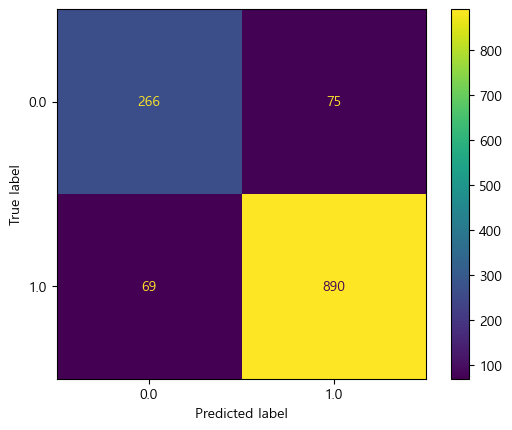

In [ ]:
model.fit(train_input, train_target)
train_score = model.score(train_input, train_target)
test_score = model.score(test_input, test_target)

print(f"{model} 적용 - 훈련정확도: {train_score}, 테스트정확도: {test_score}, 과적합여부: {train_score - test_score}")

if train_score - test_score > 0.1:
    print("과대적합으로 판단됩니다.")
    
elif train_score - test_score < 0:
    print("과소적합이 발생하였습니다.")
        
else:
    print("사용가능한 과적합 상태입니다.")

test_pred = model.predict(test_input)

correct_prediction = test_pred == test_target  
if correct_prediction.all():
    print("모든 예측이 정확합니다.")
    
else:
    correct_indices = [i for i in range(len(test_pred)) if not correct_prediction.iloc[i]]
    print(f"예측에 실패한 인덱스: {correct_indices}")
    
print(f"예측결과: {test_pred}")
print(f"실제정답: {test_target.values}")

### 정확도
acc = accuracy_score(test_target, test_pred)

### 정밀도
pre = precision_score(test_target, test_pred)

### 재현율
rec = recall_score(test_target, test_pred)

### f1-score
f1 = f1_score(test_target, test_pred)

print(f"정확도:{acc:.4f}, 정밀도:{pre:.4f}, 재현율:{rec:.4f}, f1-score:{f1:.4f}")

cm = confusion_matrix(test_target, test_pred, labels=model.classes_)
dist = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=model.classes_)
dist.plot()
plt.show()
print("")

### (해석)
# - 랜덤포레스트의 훈련정확도는 높은 편이나, 테스트 정확도는 다소 낮게 나왔음
# - 또한 과대적합을 보이고 있음, 따라서 튜닝을 통한 성능 향상이 필요함
# - 다만, 해당 모델로 평가한 결과
#   정밀도, 재현율, f1-score의 지표는 매우 높게 나왔기에
#   지표만으로 판단할 경우 해당 모델을 선정하는데 문제가 없음
#   그러나, 과대적합이 다소 보이기에 튜닝 이후 다시 한번 비교 평가가 필요함

### 오차행렬도 해석
# - 긍정오류는 75건, 부정오류는 69건으로
# - 정밀도는 0.923로 긍정적 오류에 대한 지표결과는 매우 좋으며,
# - 재현율 또한 0.928로 부정적 오류에 대한 지표결과 또한 매우 좋음
#- 긍정 및 부정 오류에 대한 전체 평가지표인 f1-score는 0.925로 전체 평가지표는 매우 좋음